<a href="https://colab.research.google.com/github/anshiitm/se2001-21f2000398/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up your computer

In [1]:
%pip install feature-engine
%pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


# Variable Types

## Numerical Variables

### Data Load

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Let's load the dataset.

# Variable definitions:
#----------------------
# disbursed_amount: loan amount given to the borrower.
# interest: interest rate.
# income: annual income.
# number_open_accounts: open accounts (more on this later).
# number_credit_lines_12: accounts opened in the last 12 months.
# target: loan status(paid or being repaid = 1, defaulted = 0).

data = pd.read_csv('/content/loan.csv')
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


### Continuous Variable

In [4]:
# Let's look at the values of the variable disbursed_amount.
# This is the amount of money requested by the borrower.

# This variable is continuous: it can take, in principle,
# any value.

data['disbursed_amount'].unique()

array([23201.5 ,  7425.  , 11150.  , ...,  6279.  , 12894.75, 25584.  ])

Text(0, 0.5, 'Number of Loans')

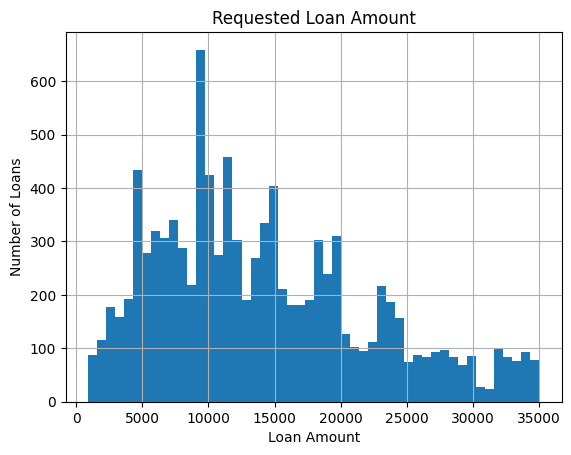

In [5]:
# Let's make a histogram to get familiar with the
# variable distribution.

fig = data['disbursed_amount'].hist(bins=50)

fig.set_title('Requested Loan Amount')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

In [6]:
# Let's examine variable interest rate,
# which is the interest charged by the finance
# company to the borrowers.

# This variable is also continuous: it can take, in principle,
# any value within the range.

data['interest'].unique()

array([15.484 , 11.2032,  8.51  , ..., 12.9195, 11.2332, 11.0019])

Text(0, 0.5, 'Number of Loans')

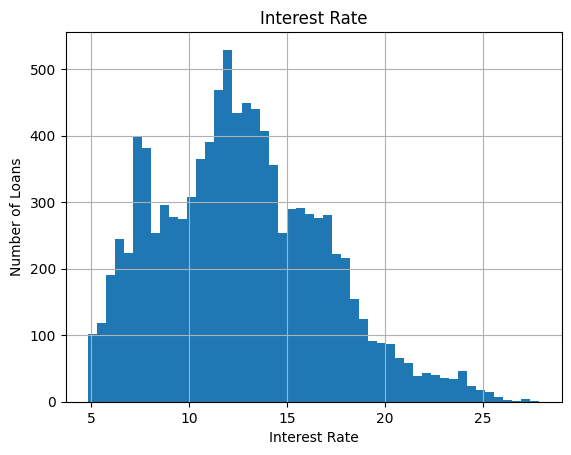

In [7]:
fig = data['interest'].hist(bins=50)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

Text(0, 0.5, 'Number of Customers')

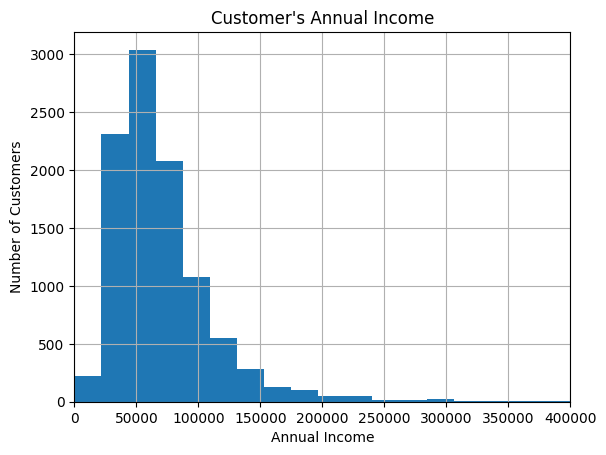

In [9]:
# Now, let's explore the income declared by the customers,
# that is, how much they earn yearly.

# This variable is also continuous.

fig = data['income'].hist(bins=100)

fig.set_xlim(0,400000)

fig.set_title('Customer\'s Annual Income')
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

In [10]:
data['number_open_accounts'].dropna().unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

Text(0, 0.5, 'Number of Customers')

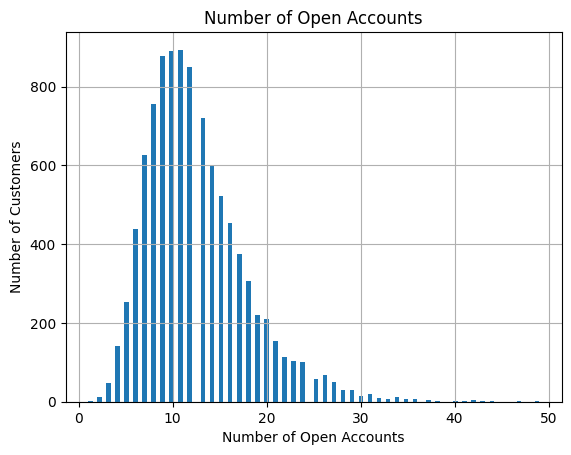

In [16]:
fig = data['number_open_accounts'].hist(bins=100)

fig.set_title('Number of Open Accounts')
fig.set_xlabel('Number of Open Accounts')
fig.set_ylabel('Number of Customers')

In [21]:
data['number_credit_lines_12'].dropna().unique()

array([2., 4., 1., 0., 3., 5., 6.])

Text(0, 0.5, 'Number of borrowers')

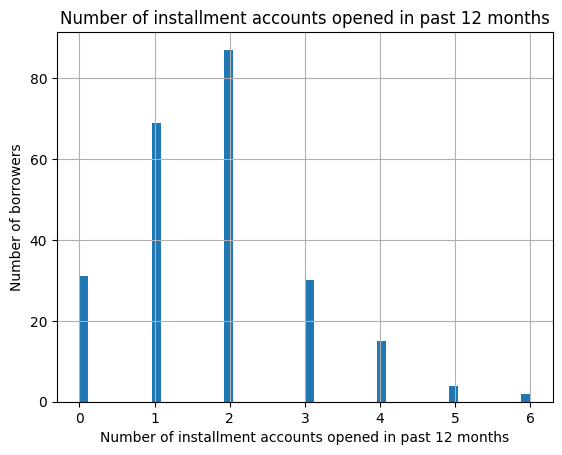

In [26]:
fig = data['number_credit_lines_12'].hist(bins=50)

fig.set_title('Number of installment accounts opened in past 12 months')
fig.set_xlabel('Number of installment accounts opened in past 12 months')
fig.set_ylabel('Number of borrowers')

### Binary Variable

In [27]:
# A binary variable, can take 2 values. For example in
# the variable "target", either the loan is
# defaulted (1) or not (0).

data['target'].unique()

array([0, 1])

Text(0, 0.5, 'Number of Loans')

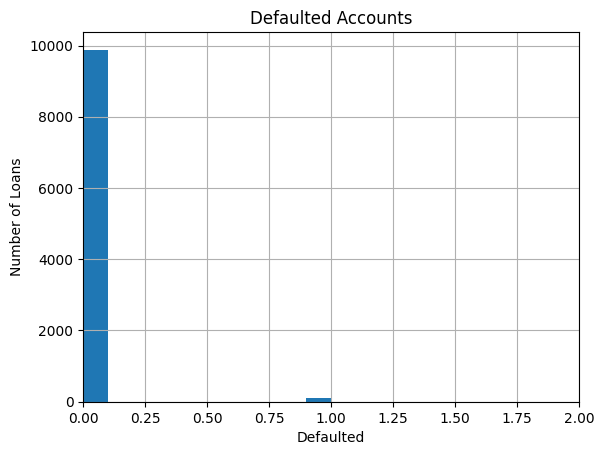

In [32]:
# Let's make a histogram, although histograms for
# binary variables do not make a lot of sense.

fig = data['target'].hist()
fig.set_xlim(0,2)
fig.set_title('Defaulted Accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')

## Categorical Variables

In [34]:
data['householder'].unique()

array(['RENT', 'OWNER', 'MORTGAGE'], dtype=object)

Text(0, 0.5, 'Number of customers')

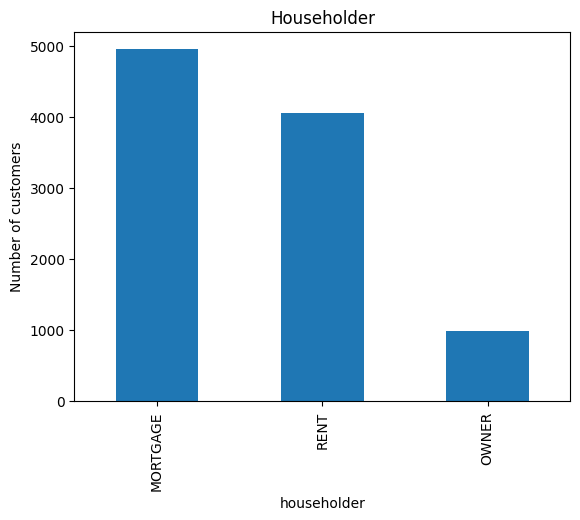

In [40]:
fig = data['householder'].value_counts().plot.bar()
fig.set_title('Householder')
fig.set_ylabel('Number of customers')

In [43]:
data['householder'].value_counts()

,count
householder,
MORTGAGE,4957
RENT,4055
OWNER,988


Text(0, 0.5, 'Number of customers')

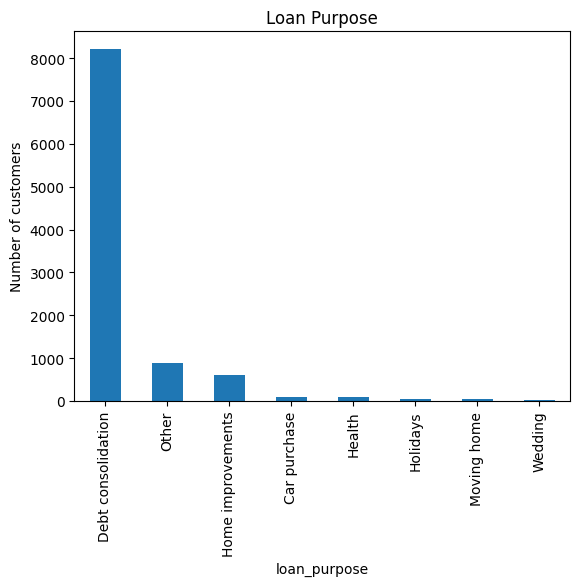

In [45]:
# Let's make a bar plot with the number of borrowers
# in each category.

# The code below counts the number of observations (borrowers)
# per category and then makes a plot.

fig = data['loan_purpose'].value_counts().plot.bar()
fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers')

Text(0, 0.5, 'Number of customers')

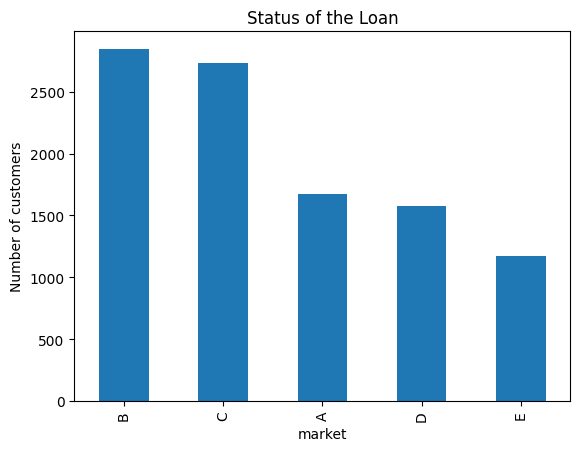

In [48]:
# Let's look at one additional categorical variable:
# "market", which represents the risk market or risk band
# assigned to the borrower.
# Let's make a bar plot with the number of borrowers
# per category.

fig = data['market'].value_counts().plot.bar()
fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers')

In [51]:
print('Total Customer IDs:', len(data['customer_id'].unique()))

data['customer_id'].head()

Total Customer IDs: 10000


,customer_id
0,0
1,1
2,2
3,3
4,4


## Date and Time Variables

In [53]:
# Pandas assigns type 'object' to dates
# when loading from csv.

# Let's have a look:

data[['date_issued', 'date_last_payment']].dtypes

,0
date_issued,object
date_last_payment,object


In [56]:
# Let's parse the dates into datetime format.
# This will allow us to make some analysis afterwards.

data['date_issued_dt'] = pd.to_datetime(data['date_issued'])
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment'])

data[['date_issued', 'date_issued_dt', 'date_last_payment', 'date_last_payment_dt']].head()

,date_issued,date_issued_dt,date_last_payment,date_last_payment_dt
0,2013-06-11,2013-06-11,2016-01-14,2016-01-14
1,2014-05-08,2014-05-08,2016-01-25,2016-01-25
2,2013-10-26,2013-10-26,2014-09-26,2014-09-26
3,2015-08-20,2015-08-20,2016-01-26,2016-01-26
4,2014-07-22,2014-07-22,2016-01-11,2016-01-11


In [57]:
# Let's extract the month and the year from the
# datetime variable to make plots.

data['month'] = data['date_issued_dt'].dt.month
data['year'] = data['date_issued_dt'].dt.year

Text(0, 0.5, 'Disbursed Amount')

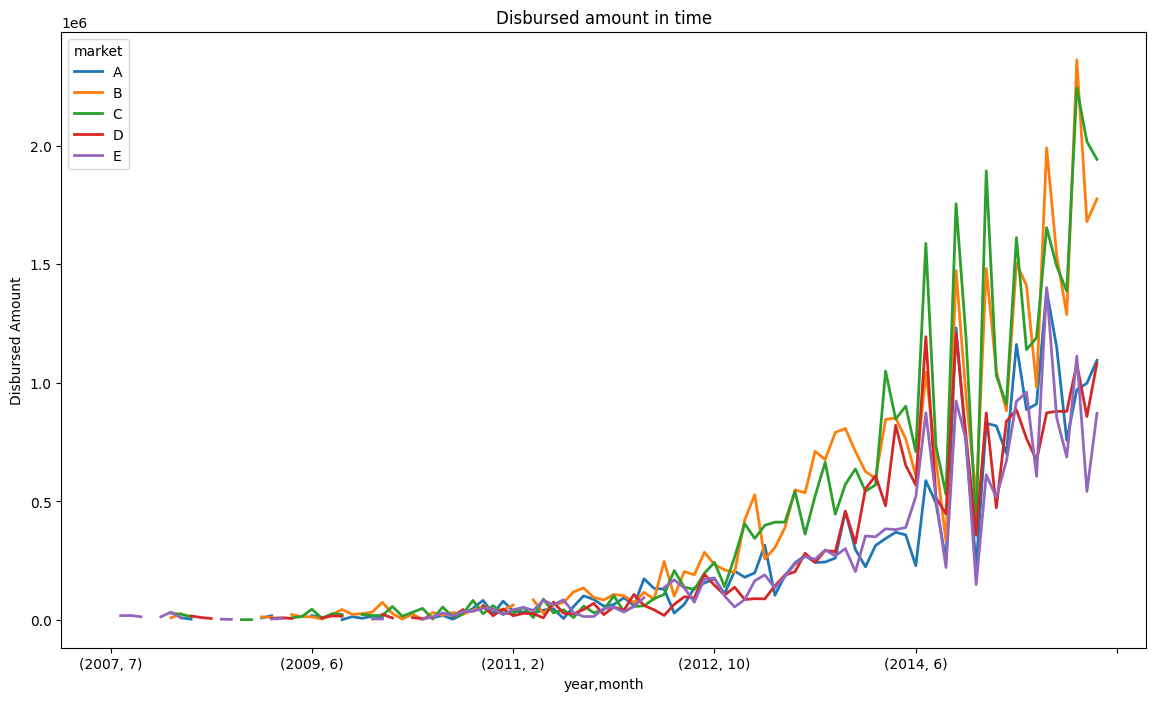

In [68]:
# Let's see how much money has been disbursed
# over the years to the different risk
# markets (grade variable).

fig = data.groupby(['year', 'month', 'market'])['disbursed_amount'].sum().unstack().plot(figsize=(14,8), linewidth=2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed Amount')